In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
root_dir = 'C:\\Users\\Tysh\\Desktop\\SimStackTest\\Workflows\\'
test_DFT='TestsDFT'
test_DFTB='TestDFTB'
train_name = 'data'
save_name = 'data_model'
technical='model_2B_nUnit'

In [3]:
train_dir = os.path.join(root_dir, train_name)
technical_dir = os.path.join(root_dir, technical)
save_dir = os.path.join(root_dir, save_name)
testDFT_dir = os.path.join(root_dir, test_DFT)
testDFTB_dir = os.path.join(root_dir, test_DFTB)
"""
try:
    os.mkdir(train_dir)
    os.mkdir(save_dir)
    os.mkdir(technical_dir)
except:
    raise OSError("Folders already exist")
"""

'\ntry:\n    os.mkdir(train_dir)\n    os.mkdir(save_dir)\n    os.mkdir(technical_dir)\nexcept:\n    raise OSError("Folders already exist")\n'

In [4]:
path, dirs, filesDFTB = next(os.walk(testDFTB_dir))
fileDFTB_count = len(filesDFTB)
path, dirs, filesDFT = next(os.walk(testDFT_dir))
fileDFT_count = len(filesDFT)

In [5]:
f = open(os.path.join(train_dir, 'DFTB.dat'), 'w')
for i in range(1,fileDFTB_count+1):
    searchfile = open(os.path.join(testDFTB_dir, 'Origin000%soutput.txt' %i), "r")   
    for line in searchfile:
        if "Total Energy:" in line: 
            splitted=line.split()
            f.write(splitted[-4]+ "\n") 
    searchfile.close()
f.close()

In [6]:
g = open(os.path.join(train_dir, 'DFT.dat'), 'w')
for j in range(1,fileDFT_count+1):
    searchfile = open(os.path.join(testDFT_dir, 'DFT%s.out' %j), "r")   
    for line in searchfile:
        if "Total Energy" in line: 
            splitted=line.split()
            g.write(splitted[-4]+ "\n") 
    searchfile.close()
g.close()

In [7]:
#Get energy for normalization values, very similar but outside a loop
"""
searchfile = open(os.path.join(testDFT_dir, 'infinite.out'), "r")   
for line in searchfile:
    if "Total Energy" in line: 
        splitted=line.split()
        DFTnorm=float(splitted[-4])
print(DFTnorm)
"""
DFTnorm=3


In [8]:
md_low_rel_e_arr_name  = os.path.join(train_dir, 'DFTB.dat')
md_high_rel_e_arr_name = os.path.join(train_dir, 'DFT.dat')
try:
    md_dftb_ref_e_arr = np.loadtxt(md_low_rel_e_arr_name)+DFTnorm
    md_pbe_ref_e_arr = np.loadtxt(md_high_rel_e_arr_name)+3
except:
    raise OSError("Cannot Read md_calc_rel_e_arr")

md_rel_energy_arr = (md_pbe_ref_e_arr - md_dftb_ref_e_arr)*627.5

(array([1.8  , 1.825, 1.85 , 1.875, 1.9  , 1.925, 1.95 , 1.975, 2.   ,
        2.025]), <a list of 10 Text major ticklabel objects>)

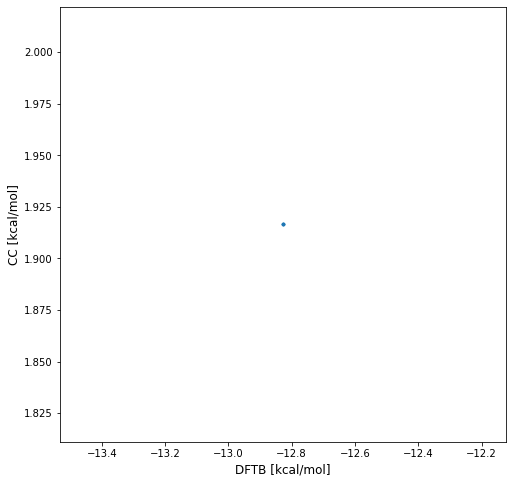

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(md_dftb_ref_e_arr, md_pbe_ref_e_arr,s=7)
plt.xlabel('DFTB [kcal/mol]', fontsize = 12)
plt.ylabel('CC [kcal/mol]', fontsize = 12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

C:\Users\Tysh\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Tysh\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


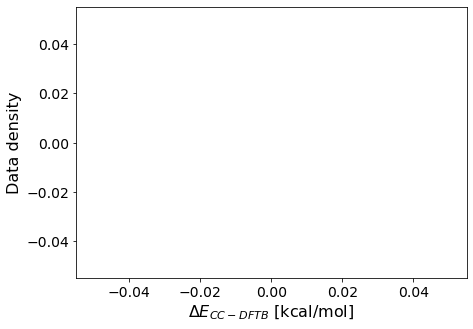

In [10]:
plt.figure(figsize=(7,5))
import seaborn as sns
sns.distplot(md_rel_energy_arr,hist = False, color='blue',kde = True,kde_kws = {'shade': True})
#sns.distplot(b,hist = False, color='red',kde = True,kde_kws = {'shade': True},label='Final dataset')

plt.xlabel('$\Delta E _{CC-DFTB}$ [kcal/mol]',fontsize=16)
plt.ylabel('Data density', fontsize = 16)
plt.tick_params(axis='both', labelsize=14)

